In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("bank-additional-full.csv",sep=';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<AxesSubplot:>

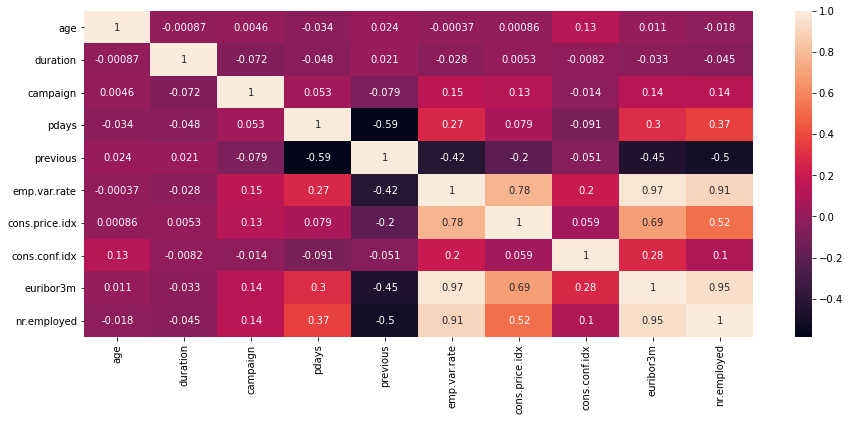

In [5]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>],
       [<AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp.var.rate'}>],
       [<AxesSubplot:title={'center':'cons.price.idx'}>,
        <AxesSubplot:title={'center':'cons.conf.idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>],
       [<AxesSubplot:title={'center':'nr.employed'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

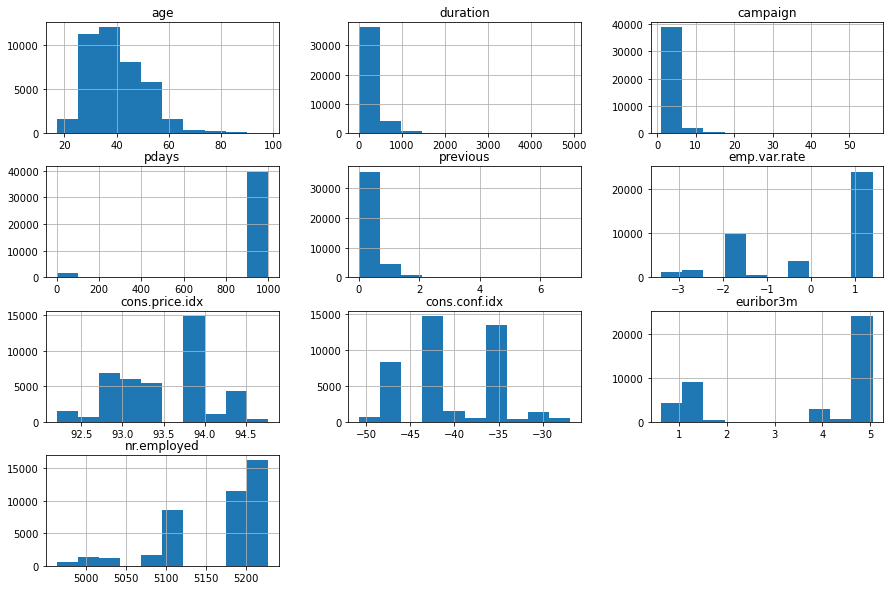

In [6]:
df.hist(figsize=(15,10))

<AxesSubplot:xlabel='y', ylabel='count'>

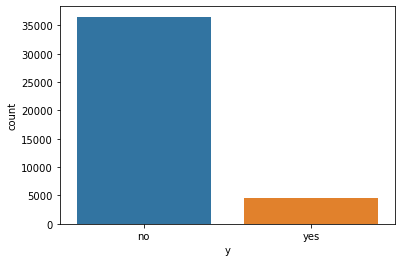

In [7]:
sns.countplot(x="y",data=df)    #dataset is imbalanced

In [8]:
df["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [10]:
df["y"]=le.fit_transform(df["y"])

In [11]:
df["y"]

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int32

In [12]:
df=pd.get_dummies(df,columns=["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome"])

In [13]:
df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0


In [14]:
x=df.loc[:,df.columns!="y"]
x

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0


In [15]:
y=df["y"]
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int32

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

In [17]:
import random 
random.seed(3434200)

In [18]:
split=StratifiedShuffleSplit(n_splits=10,test_size=0.20,random_state=18)
for train_index,test_index in split.split(df,df["y"]):
    train_set=df.loc[train_index]
    test_set=df.loc[test_index]


In [19]:
train_set["y"].value_counts()

0    29238
1     3712
Name: y, dtype: int64

In [20]:
#upsampling

In [21]:
from sklearn.utils import resample

In [22]:
train_positive=train_set[train_set["y"]==1]
train_negative=train_set[train_set['y']==0]

In [23]:
train_up=resample(train_positive,replace=True,random_state=18,n_samples=29238)

In [24]:
train_upsample=pd.concat([train_negative,train_up])

In [25]:
train_upsample["y"].value_counts()

1    29238
0    29238
Name: y, dtype: int64

In [26]:
xtrain=train_upsample.drop("y",axis=1)
xtest=test_set.drop("y",axis=1)
ytrain=train_upsample['y']
ytest=test_set["y"]

In [63]:
ximb=train_set.drop("y",axis=1)
yimb=train_set['y']

In [28]:
#define functions

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_auc_score,make_scorer

In [37]:
def fit_classifier(model,X,Y,parameters=None,scorer_metric=None):
    grid=GridSearchCV(estimator=model,param_grid=parameters,scoring=make_scorer(scorer_metric),cv=10)
    gridfit=grid.fit(X,Y)
    model_estimator=gridfit.best_estimator_
    model_estimator.fit(X,Y)
    ypred=model_estimator.predict(X)
    
    print("\n")
    print("\n model performance on trainning set\n")
    print("final accuracy score:{:.4f}".format(accuracy_score(Y,ypred)))
    print("final precision score:{:.4f}".format(precision_score(Y,ypred)))
    print("final recall score:{:.4f}".format(recall_score(Y,ypred)))
    print("final roc auc score:{:.4f}".format(roc_auc_score(Y,ypred)))
    print("\n")
    
    return model_estimator

In [31]:
def classifier(model_fit,X,Y):
    ypred=model_fit.predict(X)
    print("\n")
    print("\n model performance on test set\n")
    print("final accuracy score:{:.4f}".format(accuracy_score(Y,ypred)))
    print("final precision score:{:.4f}".format(precision_score(Y,ypred)))
    print("final recall score:{:.4f}".format(recall_score(Y,ypred)))
    print("final roc auc score:{:.4f}".format(roc_auc_score(Y,ypred)))
    print("\n")
    
    return ypred

In [32]:
from sklearn.metrics import roc_curve

In [71]:
def roc_curve_plot(model,X,Y,label=None):
    if label=="neutral network":
        yscore=model.predict_proba(X)[:,0]
    else:
        yscore=model.predict_proba(X)[:,1]
        
    roc=roc_curve(Y,yscore)
    
    plt.plot(roc[0],roc[1],label=label)
    plt.plot([0,1],[0,1],"k---")
    plt.axis([0,1,0,1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    
    roc_score=auc(roc[0],roc[1])
    
    print("auc score of % is%.4f."%(label,roc_score))

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
parameters_lr={"C":[0.0006,0.0007,0.0008]}

In [38]:
lr=fit_classifier(LogisticRegression(random_state=18),xtrain,ytrain,parameters=parameters_lr,scorer_metric=recall_score)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c




 model performance on trainning set

final accuracy score:0.8460
final precision score:0.8415
final recall score:0.8524
final roc auc score:0.8460




C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
import joblib

In [49]:
joblib.dump(lr,"LogisticRegression.pkl")

['LogisticRegression.pkl']

In [39]:
ytest_lr=classifier(lr,xtest,ytest)




 model performance on test set

final accuracy score:0.8530
final precision score:0.4255
final recall score:0.8707
final roc auc score:0.8607




In [41]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
parameters_dt={"max_depth":[4,5,6]}

In [44]:
dt=fit_classifier(DecisionTreeClassifier(random_state=18),xtrain,ytrain,parameters=parameters_dt,scorer_metric=recall_score)




 model performance on trainning set

final accuracy score:0.8723
final precision score:0.8240
final recall score:0.9468
final roc auc score:0.8723




In [50]:
ytest_dt=classifier(dt,xtest,ytest)




 model performance on test set

final accuracy score:0.8252
final precision score:0.3875
final recall score:0.9504
final roc auc score:0.8799




In [51]:
joblib.dump(dt,"DecisionTreeClassifier.pkl")

['DecisionTreeClassifier.pkl']

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
parameters_rf={"max_depth":[4,5,6],"n_estimators":[10]}

In [58]:
rf=fit_classifier(RandomForestClassifier(random_state=18),xtrain,ytrain,parameters=parameters_rf,scorer_metric=recall_score)




 model performance on trainning set

final accuracy score:0.8451
final precision score:0.8244
final recall score:0.8770
final roc auc score:0.8451




In [59]:
joblib.dump(rf,"RandomForestClassifier.pkl")

['RandomForestClassifier.pkl']

In [60]:
ytest_rf=classifier(rf,xtest,ytest)




 model performance on test set

final accuracy score:0.8273
final precision score:0.3824
final recall score:0.8675
final roc auc score:0.8448




In [ ]:
#roc curve

In [ ]:
roc_curve_plot(lr,ximb,yimb,label="logistic regresion")

In [ ]:
roc_curve_plot(dt,ximb,yimb,label="decision tree")

In [ ]:
roc_curve_plot(rf,ximb,yimb,label="random forest")

In [ ]:
roc_curve_plot(lr,xtest,ytest,label="logistic regresion")

In [ ]:
roc_curve_plot(dt,xtest,ytest,label="decision tree")

In [ ]:
roc_curve_plot(rf,xtest,ytestr,label="random forest")

In [ ]:
#free form

In [73]:
rf.feature_importances_

array([4.26795000e-03, 2.85085058e-01, 1.21083973e-03, 3.24816290e-02,
       6.93164012e-02, 3.71280345e-02, 2.30304360e-02, 9.54487386e-02,
       1.38417484e-01, 1.49014965e-01, 0.00000000e+00, 2.82625143e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.18728968e-03, 0.00000000e+00, 0.00000000e+00,
       7.98247005e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.80631443e-03, 0.00000000e+00, 4.35646514e-05, 3.76448900e-05,
       0.00000000e+00, 8.99133157e-05, 0.00000000e+00, 1.28793278e-04,
       1.88199997e-04, 0.00000000e+00, 1.43135146e-02, 2.07554223e-03,
       0.00000000e+00, 2.59811249e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.72053654e-05, 0.00000000e+00, 8.00103180e-03,
       6.68952515e-02, 6.75865040e-03, 8.56934413e-05, 0.00000000e+00,
       2.00847566e-03, 1.48287401e-04, 9.45499425e-03, 1.46241372e-02,
       0.00000000e+00, 9.54326754e-03, 0.00000000e+00, 8.83512065e-05,
      

In [74]:
feature_importance_rf=pd.Series(index=xtrain.columns,data=rf.feature_importances_)

In [82]:
feature_importance_rf

age                     0.004268
duration                0.285085
campaign                0.001211
pdays                   0.032482
previous                0.069316
                          ...   
day_of_week_tue         0.000000
day_of_week_wed         0.000053
poutcome_failure        0.002242
poutcome_nonexistent    0.000000
poutcome_success        0.020293
Length: 63, dtype: float64

In [84]:
dt.feature_importances_

array([0.        , 0.57196253, 0.        , 0.00457898, 0.        ,
       0.        , 0.        , 0.10937924, 0.08751501, 0.21206544,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01449881, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [85]:
feature_importance_dt=pd.Series(index=xtrain.columns,data=dt.feature_importances_)

In [86]:
feature_importance_dt

age                     0.000000
duration                0.571963
campaign                0.000000
pdays                   0.004579
previous                0.000000
                          ...   
day_of_week_tue         0.000000
day_of_week_wed         0.000000
poutcome_failure        0.000000
poutcome_nonexistent    0.000000
poutcome_success        0.000000
Length: 63, dtype: float64